# Problem 1

The equation we want to plot:
\begin{equation}
    \frac{x_A - x_{A-}}{x_{A+}-x_{A-}}= \frac{1}{2}+\frac{1}{\pi}\sum_{k=0}^\infty\frac{1}{m}sin(\frac{m\pi z}{l})exp(-\frac{m^2\pi^2}{l^2}D_{AB}t)
\end{equation}
with
$$
    m = k+\frac{1}{2}
$$

Import modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

#### Problem 1.1
Create function that solves the above equation. Summation terms are added while err > 0.0001. Plot the results.

Kept  156 terms at t=1.00e-02
Kept   20 terms at t=1.00e+00
Kept    8 terms at t=1.00e+01
Kept    3 terms at t=1.00e+02
Kept    2 terms at t=1.00e+03


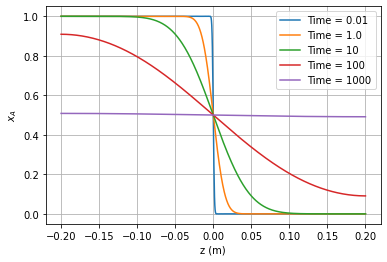

In [2]:
times = [0.01,1.0,10,100,1000]
nz  = 500     # number of points in the z-direction
L   = 0.2     # tube half-length, meters
z   = np.linspace(-L,L,999)

startTime = time.time()

# Build a function to calculate the mole fraction as a function of z at the given point in time
def profile(t):
    Xto = 0     # initial composition in top section
    Xbo = 1     # initial composition in bottom section

    Dab = 0.7          # Diffusivity in cm2/s
    Dab = Dab * 1e-4    # convert to m2/s
                   
    # calculate the infinite series, keeping as many terms as needed for this point in time.
    
    sumTerm = 0*z
    err = 1   # how much the summation changed when the latest term was added
    k   = 0   # how many terms we've included
    while err > .0001:   # add terms until series converges
        m = k + 0.5
        old = sumTerm
        sumTerm = sumTerm + 1/m*np.sin(m*np.pi*z/L)*np.exp(-m**2*np.pi**2/L**2*Dab*t)
        err = max(abs(old-sumTerm))
        k = k+1

    print('Kept {:-4d} terms at t={:.2e}'.format(k,t))

    return Xbo + (Xto-Xbo) * ( 0.5 + 1/np.pi * sumTerm )
endTime = time.time()


# Solve problem to get average compositions for top section
for t in times:
    plt.plot(z,profile(t),label=''.join(['Time = ',str(t)]))
    
plt.grid()
plt.xlabel('z (m)')
plt.ylabel('$x_A$')
plt.legend();


#### Problem 1.2
Define function that plots above results as a widget. The widget slider is on a log scale.

In [3]:
%matplotlib inline
import ipywidgets as widgets

# A function to generate x(z) at a given t and plot the result
def plot_it(t):
    startTime = time.time()
    plt.plot(z,profile(t))
    endTime = time.time()
    plt.ylim(0,1)
    plt.title(''.join(['Computing time = ','{:e}'.format(endTime-startTime),' sec']))
    plt.grid()
    plt.ylabel('$x_A$')
    plt.xlabel('z (m)')
    # set up grid, plot labels, y-limits, title, etc.
twidget = widgets.FloatLogSlider(
    value=10,
    base=10,
    min = -2,
    max = 3,
    step=1
)
widgets.interact(plot_it, t=twidget);


interactive(children=(FloatLogSlider(value=10.0, description='t', max=3.0, min=-2.0, step=1.0), Output()), _do…